<a href="https://colab.research.google.com/github/DanB1421/DATA601/blob/main/Brilliant_Hw_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 601 - Fall 2022
### Homework Assignment 5
Total points : (30 + 10)<br>
 Please provide your solutions into the cells provided after question cells. You can create new cells as needed. <br>

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

<b>Question 1</b> [<span style="color: red;">10 points</span>]:<br>
Consider the following line $y = x +1$ for a line segment s.t $x\in [1,2]$

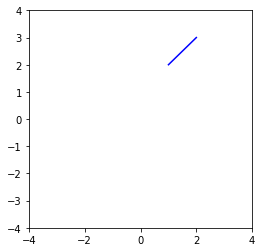

In [ ]:
xy_orig = np.zeros([2,100]) # x is 0th row, y is 1st row
xy_orig[0] = np.linspace(1,2,100)
xy_orig[1] = (xy_orig[0] + 1)

fig, ax = plt.subplots()
ax.plot(xy_orig[0],xy_orig[1],color='b')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show()

Now with the $A$ defined below, Do the following:
- Use the matrix $A$ to transfrom the line segment in <code>xy_orig</code> and plot a plot (use the same settings for <code>matplotlib</code> as above).
- Then, Calculate the Singular Value Decomposition (svd) $A=U\Sigma V^H$
- Use the matrices from SVD to plot a step-by-step transformation starting from <code>xy_orig</code>, plot after each transformation (Hint : apply $V^H$ first, then $\Sigma$ and so forth)
- Compare the final transformation from applying SVD to the transformation using $A$
(Hint : use <code>SVD_example.ipynb</code> for guidance.

In [ ]:
A = np.array([[ 0.8660254, -1.5],[ 2.5, -0.8660254]])
xy = np.zeros([2,100])

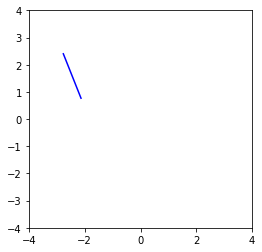

In [ ]:
#Your answer goes below
for i in range(xy_orig.shape[1]):
    xy[:,i] = np.matmul(A,xy_orig[:,i]) # transforms xy by multiplying the A matrix by each point within the range of xy_orig

fig, ax = plt.subplots()
ax.plot(xy[0],xy[1],color='b')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show() # plots the transformed line segment with the same parameters as the original

In [ ]:
U, s, Vh = np.linalg.svd(A) # performs SVD operation
S = np.diag(s) # converts S component of SVD to diagonal matrix

In [ ]:
Arecon = np.matmul(np.matmul(U,S),Vh) # calculates the reconstructed A matrix from the SVD
np.linalg.norm(A - Arecon) # shows the norm of the difference between the original A matrix and the reconstructed A matrix (very little difference)

4.002966042486721e-16

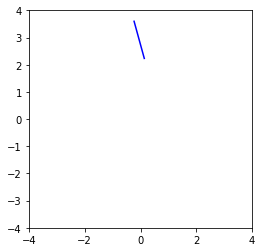

In [ ]:
xy = np.zeros([2,100]) # re-initializes xy to the original form

for i in range(xy_orig.shape[1]):
    xy[:,i] = np.matmul(Vh,xy_orig[:,i]) # performs the first step of SVD by transforming xy with the Vh matrix

fig, ax = plt.subplots()
ax.plot(xy[0],xy[1],color='b')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show() # plots the transformed line segment with the same parameters as the original

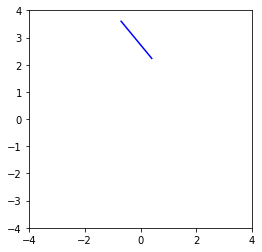

In [ ]:
for i in range(xy_orig.shape[1]):
    xy[:,i] = np.matmul(S,xy[:,i]) # performs the second step of SVD by transforming the Vh-applied xy with the S matrix

fig, ax = plt.subplots()
ax.plot(xy[0],xy[1],color='b')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show() # plots the transformed line segment with the same parameters as the original

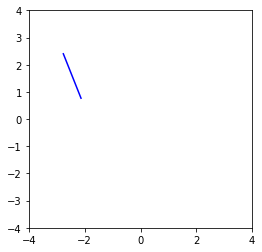

In [ ]:
for i in range(xy_orig.shape[1]):
    xy[:,i] = np.matmul(U,xy[:,i]) # performs the third and final step of SVD by transforming the Vh and S-applied xy with the U matrix

fig, ax = plt.subplots()
ax.plot(xy[0],xy[1],color='b')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show() # plots the transformed line segment with the same parameters as the original

Here is the original transformed line segment to compare to the SVD-transformed line segment:

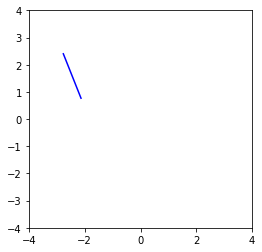

In [ ]:
xy = np.zeros([2,100])

for i in range(xy_orig.shape[1]):
    xy[:,i] = np.matmul(A,xy_orig[:,i])

fig, ax = plt.subplots()
ax.plot(xy[0],xy[1],color='b')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show()

By comparison, the SVD step-by-step transformation produces a virtually identical plot to the original transformation.

---
A real symmetric matrix that has the following special property:

$A = Q \Lambda Q^{T}$
also,

$A^{-1} = Q \Lambda^{-1} Q^{T} $<br>
Where $Q$ is the matrix of eigenvectors (column vectors) of $A$ and $\Lambda$ is the diagonal matrix of corresponding eigenvalues.

<b>Question 2</b> [<span style="color: red;">10 points</span>]: You need to load <code>symmetric_A.npy</code> as matrix $A$.You will also need to load <code>b.npy</code> as $b$. You need to solve for $x$ such that $Ax = b$ <b>without</b> using either <code>np.linalg.inv</code> or <code>np.linalg.solve</code> anywhere in your solution.

(Hint : the inverse of a diagonal matrix is a diagonal matrix with entries that are the reciprocal of the original values (1/val).

Finally calculate the absolute error $\|Ax - b\|_2$ and relative error $\frac{\|Ax - b\|_2}{\|b\|_2}$. The absolute value should be less than $<10^{-9}$ at least.

In [ ]:
#Your answer goes below
A = np.load('/content/symmetric_A.npy') # loads symmetric_A.npy file
b = np.load('/content/b.npy') # loads b.npy file

In [ ]:
lambda1, Q = np.linalg.eig(A) # finds the eigenvalues (lambda1) and eigenvectors (Q) of matrix A

lambda1_inv = 1/(lambda1) # finds the inverse of the eigenvalues of matrix A
lambda1_inv_diag = np.diag(lambda1_inv) # creates a diagonal matrix containing the inverse of the eigenvalues of matrix A

Ainv = np.matmul(np.matmul(Q, lambda1_inv_diag), Q.T) # finds the inverse of A by multiplying the eigenvector matrix (Q) by the inverse of the diagonal eigenvalue matrix (lambda1_inv_diag) and the transpose of the eigenvector matrix (Q.T)

x = np.matmul(Ainv, b) # solves for x by multiplying the inverse of A by b
print("The solution is:",x) # prints the x solution matrix
print("Absolute error:", np.linalg.norm(A@x - b)) # finds the absolute error of the solution
print("Relative error:", np.linalg.norm(A@x - b)/np.linalg.norm(b)) # finds the relative error of the solution

The solution is: [0.94345419 0.83047431 0.64153339 0.8175818  0.84570266 0.21761469
 0.00209291 0.18230806]
Absolute error: 5.3290705182007514e-14
Relative error: 4.2623952304705767e-16


<b>Question 3</b> [<span style="color: red;">10 points</span>]: Calculate the Gradient $\nabla f(x,y,z)$ for the following function
$f(x,y,z) = x^3y^2z + x^2yz^2 + xy^3z$.
After which subsitute $x=2, y=3$ and $z=4$ in the Gradient.

In [ ]:
#Your answer goes below4
x, y, z = sp.symbols('x y z') # stores x, y, and z as symbols to be used in a function
f = (x**3 * y**2 * z) + (x**2 * y * z**2) + (x * y**3 * z) # stores the desired function in variable f
dfdx = sp.diff(f, x) # finds the partial derivative of the stored function with respect to x and stores in variable dfdx
dfdy = sp.diff(f, y) # finds the partial derivative of the stored function with respect to y and stores in variable dfdy
dfdz = sp.diff(f, z) # finds the partial derivative of the stored function with respect to z and stores in variable dfdz

In [ ]:
gradient = sp.zeros(3,1) # creates a 3 x 1 sympy matrix where the gradient will be stored
gradient[0] = dfdx # stores dfdx in the first row of the gradient
gradient[1] = dfdy # stores dfdy in the second row of the gradient
gradient[2] = dfdz # stores dfdz in the third row of the gradient
gradient # produces the gradient with symbolic solutions to the partial derivatives

Matrix([
[3*x**2*y**2*z + 2*x*y*z**2 + y**3*z],
[2*x**3*y*z + x**2*z**2 + 3*x*y**2*z],
[    x**3*y**2 + 2*x**2*y*z + x*y**3]])

In [ ]:
gradient.subs([(x, 2),(y, 3),(z,4)]) # substitutes x = 2, y = 3, and z = 4 into the partial derivatives of the gradient and solves for each

Matrix([
[732],
[472],
[222]])

BONUS QUESTION : <b>Question 3(a)</b>[<span style="color: red;">10 points</span>]: Calculate the Hessian matrix for the function $f(x,y,z)$ in Q3 and substitute with $x=2, y=3$ and $z=4$

In [ ]:
#Your answer goes below
d2fdx2 = sp.diff(f, x, x) # finds the second partial derivative of the stored function with respect to x and x and stores in variable d2fdx2
d2fdxdy = sp.diff(f, x, y) # finds the second partial derivative of the stored function with respect to x and y and stores in variable d2fdxdy
d2fdxdz = sp.diff(f, x, z) # finds the second partial derivative of the stored function with respect to x and z and stores in variable d2fdxdz
d2fdydx = sp.diff(f, y, x) # finds the second partial derivative of the stored function with respect to y and x and stores in variable d2fdydx
d2fdy2 = sp.diff(f, y, y) # finds the second partial derivative of the stored function with respect to y and y and stores in variable d2fdy2
d2fdydz = sp.diff(f, y, z) # finds the second partial derivative of the stored function with respect to y and z and stores in variable d2fdydz
d2fdzdx = sp.diff(f, z, x) # finds the second partial derivative of the stored function with respect to z and x and stores in variable d2fdzdx
d2fdzdy = sp.diff(f, z, y) # finds the second partial derivative of the stored function with respect to z and y and stores in variable d2fdzdy
d2fdz2 = sp.diff(f, z, z) # finds the second partial derivative of the stored function with respect to z and z and stores in variable d2fdz2

In [ ]:
hessian = sp.zeros(3,3) # creates a 3 x 3 sympy matrix where the hessian matrix will be stored
hessian[0] = d2fdx2 # stores d2fdx2 in the first row and first column of the hessian matrix
hessian[1] = d2fdxdy # stores d2fdxdy in the first row and second column of the hessian matrix
hessian[2] = d2fdxdz # stores d2fdxdz in the first row and third column of the hessian matrix
hessian[3] = d2fdydx # stores d2fdydx in the second row and first column of the hessian matrix
hessian[4] = d2fdy2 # stores d2fdy2 in the second row and second column of the hessian matrix
hessian[5] = d2fdydz # stores d2fdydz in the second row and third column of the hessian matrix
hessian[6] = d2fdzdx # stores d2fdzdx in the third row and first column of the hessian matrix
hessian[7] = d2fdzdy # stores d2fdzdy in the third row and second column of the hessian matrix
hessian[8] = d2fdz2 # stores d2fdz2 in the third row and third column of the hessian matrix
hessian # produces the hessian matrix with symbolic solutions to the second partial derivatives

Matrix([
[            2*y*z*(3*x*y + z), z*(6*x**2*y + 2*x*z + 3*y**2),   y*(3*x**2*y + 4*x*z + y**2)],
[z*(6*x**2*y + 2*x*z + 3*y**2),            2*x*z*(x**2 + 3*y), x*(2*x**2*y + 2*x*z + 3*y**2)],
[  y*(3*x**2*y + 4*x*z + y**2), x*(2*x**2*y + 2*x*z + 3*y**2),                      2*x**2*y]])

In [ ]:
hessian.subs([(x, 2),(y, 3),(z,4)]) # substitutes x = 2, y = 3, and z = 4 into the second partial derivatives of the hessian matrix and solves for each

Matrix([
[528, 460, 231],
[460, 208, 134],
[231, 134,  24]])